<a href="https://colab.research.google.com/github/paggiLuca/Python/blob/main/Esercizio_Pandas_Merge_BikeStores_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
dfCategories = pd.read_excel("https://github.com/wtitze/4E/blob/main/BikeStores.xls?raw=true", sheet_name="categories")
dfCategories

,category_id,category_name
0,1,Children Bicycles
1,2,Comfort Bicycles
2,3,Cruisers Bicycles
3,4,Cyclocross Bicycles
4,5,Electric Bikes
5,6,Mountain Bikes
6,7,Road Bikes


In [ ]:
dfBrands = pd.read_excel("https://github.com/wtitze/4E/blob/main/BikeStores.xls?raw=true", sheet_name="brands")
dfBrands

,brand_id,brand_name
0,1,Electra
1,2,Haro
2,3,Heller
3,4,Pure Cycles
4,5,Ritchey
5,6,Strider
6,7,Sun Bicycles
7,8,Surly
8,9,Trek


In [ ]:
dfProducts = pd.read_excel("https://github.com/wtitze/4E/blob/main/BikeStores.xls?raw=true", sheet_name="products")
dfProducts

,product_id,product_name,brand_id,category_id,model_year,list_price
0,1,Trek 820 - 2016,9,6,2016,379.99
1,2,Ritchey Timberwolf Frameset - 2016,5,6,2016,749.99
2,3,Surly Wednesday Frameset - 2016,8,6,2016,999.99
3,4,Trek Fuel EX 8 29 - 2016,9,6,2016,2899.99
4,5,Heller Shagamaw Frame - 2016,3,6,2016,1320.99
...,...,...,...,...,...,...
316,317,Trek Checkpoint ALR 5 - 2019,9,7,2019,1999.99
317,318,Trek Checkpoint ALR 5 Women's - 2019,9,7,2019,1999.99
318,319,Trek Checkpoint SL 5 Women's - 2019,9,7,2019,2799.99
319,320,Trek Checkpoint SL 6 - 2019,9,7,2019,3799.99


1. il catalogo complessivo dei prodotti. Visualizzare il nome del prodotto, il nome della marca e la categoria

In [ ]:
df2 = pd.merge(dfProducts, dfCategories, how= "inner", on=["category_id"])
df2

,product_id,product_name,brand_id,category_id,model_year,list_price,category_name
0,1,Trek 820 - 2016,9,6,2016,379.99,Mountain Bikes
1,2,Ritchey Timberwolf Frameset - 2016,5,6,2016,749.99,Mountain Bikes
2,3,Surly Wednesday Frameset - 2016,8,6,2016,999.99,Mountain Bikes
3,4,Trek Fuel EX 8 29 - 2016,9,6,2016,2899.99,Mountain Bikes
4,5,Heller Shagamaw Frame - 2016,3,6,2016,1320.99,Mountain Bikes
...,...,...,...,...,...,...,...
316,317,Trek Checkpoint ALR 5 - 2019,9,7,2019,1999.99,Road Bikes
317,318,Trek Checkpoint ALR 5 Women's - 2019,9,7,2019,1999.99,Road Bikes
318,319,Trek Checkpoint SL 5 Women's - 2019,9,7,2019,2799.99,Road Bikes
319,320,Trek Checkpoint SL 6 - 2019,9,7,2019,3799.99,Road Bikes


In [ ]:
dfCatalogoComplessivo= pd.merge(df2, dfBrands, how= "inner", on= ["brand_id"])
dfCatalogoComplessivo[["product_name", "category_name", "brand_name"]]

,product_name,category_name,brand_name
0,Trek 820 - 2016,Mountain Bikes,Trek
1,Trek Fuel EX 8 29 - 2016,Mountain Bikes,Trek
2,Trek Slash 8 27.5 - 2016,Mountain Bikes,Trek
3,Trek Remedy 29 Carbon Frameset - 2016,Mountain Bikes,Trek
4,Trek X-Caliber 8 - 2017,Mountain Bikes,Trek
...,...,...,...
316,Pure Cycles Western 3-Speed - Women's - 2015/2016,Cruisers Bicycles,Pure Cycles
317,Pure Cycles William 3-Speed - 2016,Cruisers Bicycles,Pure Cycles
318,Strider Classic 12 Balance Bike - 2018,Children Bicycles,Strider
319,Strider Sport 16 - 2018,Children Bicycles,Strider


2. il numero di prodotti per ogni categoria. Visualizzare i nomi delle categorie e il numero dei prodotti.

In [ ]:
dfCatalogoComplessivo.groupby("category_name").count()["product_name"]

category_name
Children Bicycles      59
Comfort Bicycles       30
Cruisers Bicycles      78
Cyclocross Bicycles    10
Electric Bikes         24
Mountain Bikes         60
Road Bikes             60
Name: product_name, dtype: int64

3. il numero di prodotti per ogni marca (brand). Visualizzare i nomi dei brand e il numero di prodotti

In [ ]:
dfCatalogoComplessivo.groupby("brand_name").count()["product_name"]

brand_name
Electra         118
Haro             10
Heller            3
Pure Cycles       3
Ritchey           1
Strider           3
Sun Bicycles     23
Surly            25
Trek            135
Name: product_name, dtype: int64

4. i nomi dei prodotti della marca Trek

In [ ]:
dfCatalogoComplessivo[dfCatalogoComplessivo["brand_name"] == "Trek"]["product_name"]

0                            Trek 820 - 2016
1                   Trek Fuel EX 8 29 - 2016
2                   Trek Slash 8 27.5 - 2016
3      Trek Remedy 29 Carbon Frameset - 2016
4                    Trek X-Caliber 8 - 2017
                       ...                  
130             Trek Checkpoint ALR 5 - 2019
131     Trek Checkpoint ALR 5 Women's - 2019
132      Trek Checkpoint SL 5 Women's - 2019
133              Trek Checkpoint SL 6 - 2019
134      Trek Checkpoint ALR Frameset - 2019
Name: product_name, Length: 135, dtype: object

5. i prodotti delle categorie che hanno la parola 'Bikes' nel nome

In [ ]:
dfCatalogoComplessivo[dfCatalogoComplessivo["category_name"].str.contains("Bikes")][["product_name", "category_name"]]
#ho preso anche category_name per verificare se effetivamente ci fosse "Bikes" nel nome

,product_name,category_name
0,Trek 820 - 2016,Mountain Bikes
1,Trek Fuel EX 8 29 - 2016,Mountain Bikes
2,Trek Slash 8 27.5 - 2016,Mountain Bikes
3,Trek Remedy 29 Carbon Frameset - 2016,Mountain Bikes
4,Trek X-Caliber 8 - 2017,Mountain Bikes
...,...,...
197,Electra Loft Go! 8i - 2018,Electric Bikes
198,Electra Townie Go! 8i - 2017/2018,Electric Bikes
199,Electra Townie Go! 8i Ladies' - 2018,Electric Bikes
200,Electra Townie Commute Go! - 2018,Electric Bikes


6. la categoria che ha il prodotto che costa di più

In [ ]:
dfCatalogoComplessivo["list_price"] = dfCatalogoComplessivo["list_price"].round(1)
dfCatalogoComplessivo
dfCatalogoComplessivo["list_price"].max()[["category_name"]]
#dfCatalogoComplessivo.info()

7. i brand con almeno 100 prodotti. Visualizzare il nome del brand e il numero di prodotti

In [ ]:
df100 = dfCatalogoComplessivo.groupby("brand_name").count()
df100[df100["product_name"] > 100][["product_name"]]

,product_name
brand_name,
Electra,118
Trek,135


8. la marca del prodotto 'Electra Townie Original 21D - 2016'

In [ ]:
#df100.info()
#df100["product_name"] = df100["product_name"].astype(str)
#df100[df100["product_name"].isin("Electra Townie Original 21D - 2016")]

,product_id,product_name,brand_id,category_id,model_year,list_price,category_name
brand_name,,,,,,,


9. il numero di prodotti per ogni anno. Visualizzare l'anno e il numero di prodotti

In [ ]:
dfCatalogoComplessivo.groupby("model_year").count()[["product_name"]]

,product_name
model_year,
2016,26
2017,85
2018,204
2019,6


Visualizzare i grafici più adatti per le richieste 2, 3, 7 e 9

<BarContainer object of 7 artists>

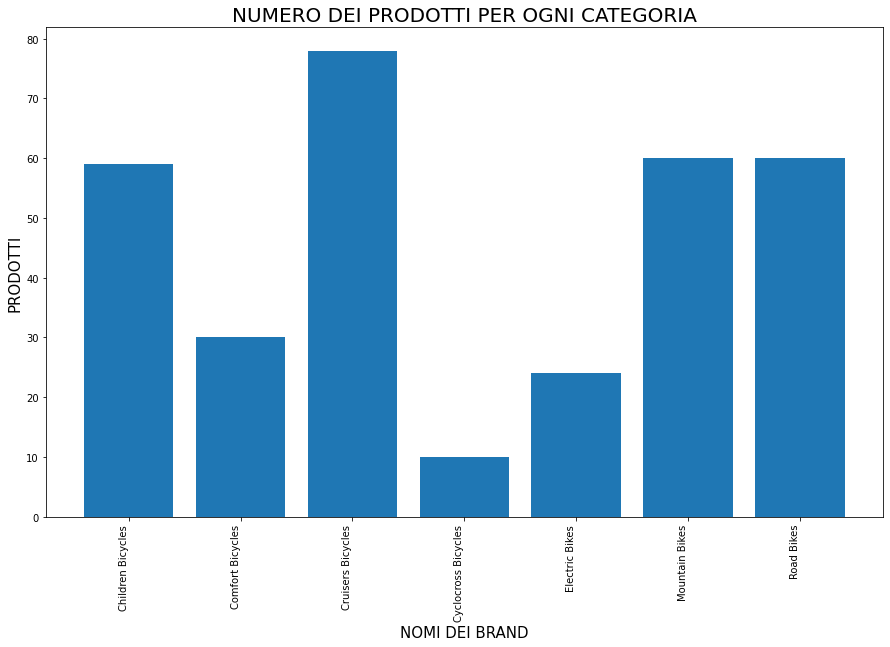

In [ ]:
#grafico= dfCatalogoComplessivo.groupby("category_name").count()[["product_name"]]

x = list(grafico.index)
y = list(grafico["product_name"])

fig,ax = plt.subplots()
fig.set_figwidth(15)
fig.set_figheight(10)
ax.set_title("NUMERO DEI PRODOTTI PER OGNI CATEGORIA", fontsize=20)
ax.set_xlabel("NOMI DEI BRAND", fontsize=15)
ax.set_ylabel("PRODOTTI", fontsize=15)
fig.autofmt_xdate(rotation=90)
ax.bar(x,y)

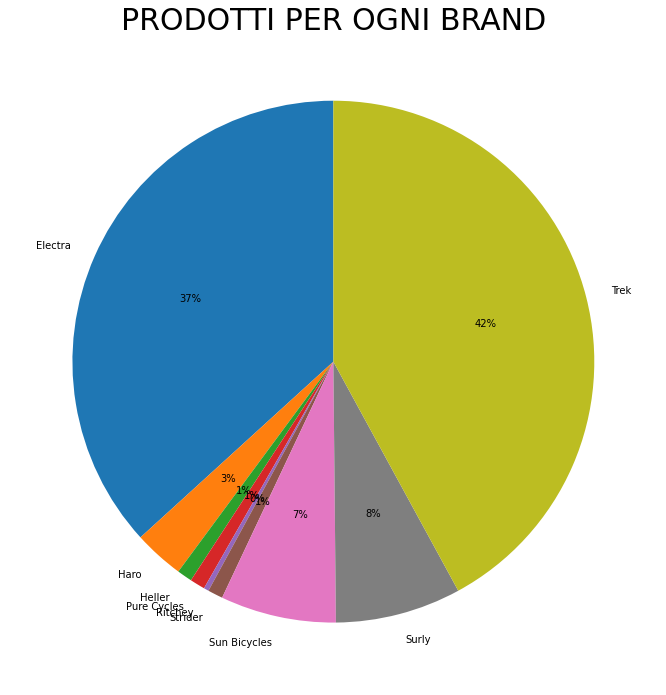

In [ ]:
#grafico2 = dfCatalogoComplessivo.groupby("brand_name").count()[["product_name"]]
labels = list(grafico2.index)
sizes = list(grafico2["product_name"])

fig1, ax1 = plt.subplots(figsize=(12, 12))
ax1.pie(sizes, labels=labels, autopct='%1.0f%%', startangle=90)
plt.title("PRODOTTI PER OGNI BRAND", fontsize= 30 )
plt.show()

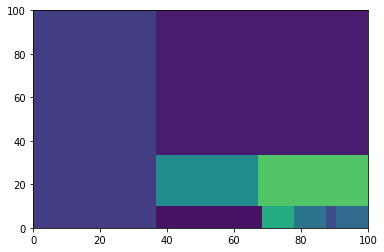

In [ ]:
df100 = dfCatalogoComplessivo.groupby("brand_name").count()
df100[df100["product_name"] > 100][["product_name"]]
!pip install squarify
import squarify

sizes = list(df100["product_name"])
squarify.plot(sizes)
plt.show()
